# mqtt 통신 확인

In [56]:
import paho.mqtt.client as mqtt
import json
import pandas as pd

# df에 저장하는 예시

columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)

def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe("mobile-ingkle-test-healthcare/sm_sn20_01/data/_all")
def on_message(client, userdata, msg):
    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
    
    print(data[0])
    
    df.loc[len(df)] = test.values()
    
    
client = mqtt.Client("mqtt-test") # client ID "mqtt-test"
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)
client.loop_forever()


Mqtt Connected!
('timestamp', 1671094742.532)
('timestamp', 1671094742.63)
('timestamp', 1671094742.735)
('timestamp', 1671094742.817)
('timestamp', 1671094742.924)
('timestamp', 1671094743.032)
('timestamp', 1671094743.129)
('timestamp', 1671094743.22)
('timestamp', 1671094743.326)
('timestamp', 1671094743.42)
('timestamp', 1671094743.534)
('timestamp', 1671094743.619)
('timestamp', 1671094743.734)
('timestamp', 1671094743.818)
('timestamp', 1671094743.924)
('timestamp', 1671094744.035)
('timestamp', 1671094744.119)


KeyboardInterrupt: 

# mqtt cv2 연결확인

In [61]:
# 데이터 저장 루프 정의

# 수신 확인
import paho.mqtt.client as mqtt
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
# df에 저장하는 예시

def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe("mobile-ingkle-test-healthcare/sm_sn20_01/data/_all")
    

def on_message(client, userdata, msg):
    global row
    
    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
    
    row=[] 
    row.append((data[1][1],data[2][1],data[3][1]))
    row = np.array(row)
    row = row[0]
    unixtime = data[0][1]
    
    
    p = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/wait.npy') 
    tp = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/time.npy') 
    #ap = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/all_time.npy') 
    
    np.save(p, row)
    np.save(tp, unixtime)
    
    print('row',row)
    print('unixtime',unixtime)


client = mqtt.Client("mqtt-test") 
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)

#client.loop_forever()

0

In [62]:
# 영상, mqtt데이터 동시수신 
import time

cap = cv2.VideoCapture(0)


while cap.isOpened():

    ret,frame = cap.read()

    client.loop()
    
    row = np.load(os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/wait.npy'))
    
    cv2.putText(frame, f'{row}', (50,50), cv2.FONT_ITALIC, 0.5, (255,0,0), 2)
    cv2.imshow('me',frame) 

    if cv2.waitKey(10)& 0xFF == ord('q'): #q를 누르면 꺼줘
            break

cap.release()
cv2.destroyAllWindows()  


Mqtt Connected!
row [-0.96251291 -2.63599324  9.41127014]
unixtime 1671094787.406
row [-0.98165548 -2.62642193  9.3993063 ]
unixtime 1671094787.505
row [-0.96729857 -2.62163639  9.41127014]
unixtime 1671094787.601
row [-0.96012008 -2.61924338  9.39691353]
unixtime 1671094787.703
row [-0.95533442 -2.61924338  9.41127014]
unixtime 1671094787.804
row [-0.96012008 -2.60488653  9.40169907]
unixtime 1671094787.901
row [-0.95533442 -2.62402916  9.3993063 ]
unixtime 1671094788.004
row [-0.96012008 -2.64077878  9.40409184]
unixtime 1671094788.103
row [-0.93379903 -2.61206508  9.41127014]
unixtime 1671094788.2
row [-0.95533442 -2.60967231  9.4184494 ]
unixtime 1671094788.3
row [-0.94576317 -2.61924338  9.41366291]
unixtime 1671094788.405
row [-0.96012008 -2.62642193  9.4064846 ]
unixtime 1671094788.5
row [-0.94097751 -2.62163639  9.42084217]
unixtime 1671094788.601
row [-0.9529416  -2.6312077   9.40169907]
unixtime 1671094788.708
row [-0.97208422 -2.62402916  9.40409184]
unixtime 1671094788.801


# 오토라벨링

In [77]:
import os
import numpy as np
DATA_PATH = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA')  #os.path.join( file name) 파일 이름만 정해주고 경로는 현재 경로이다.

actions = np.array(['leaning','sitting_chair','sitting_floor','slow_walking','standing','walking'])


no_sequences = 30 #영상 30개 만들어지는데

sequence_length = 10 #영상 1개의 프레임수는 100개



In [78]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [80]:
# 데이터 저장 루프 정의

# 수신 확인
import paho.mqtt.client as mqtt
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
# df에 저장하는 예시

def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe("mobile-ingkle-test-healthcare/sm_sn20_01/data/_all")
    

def on_message(client, userdata, msg):
    global row
    
    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
    
    row=[] 
    row.append((data[1][1],data[2][1],data[3][1]))
    row = np.array(row)
    row = row[0]
    #unixtime = data[0][1]
    
    
    #p = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/wait.npy') 
    #tp = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/time.npy') 
    #ap = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/all_time.npy') 
    np.save(path, row)
    #np.save(p, row)
    #np.save(tp, unixtime)
    
    print('row',row)
    #print('unixtime',unixtime)


client = mqtt.Client("mqtt-test") 
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)

#client.loop_forever()

0

In [81]:
# 영상과 mqtt 데이터 원하는 파일에 분류하여 저장

cap = cv2.VideoCapture(0)
print('H:',cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('w:',cap.get(cv2.CAP_PROP_FRAME_WIDTH))
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS) 
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('C:/Users/dlwnr/health care/model/mqtt1/autolabel.avi', fourcc, fps, (w, h))


    
# 액션 선택
for action in actions:
    # 영상 선택
    for sequence in range(no_sequences):
        # 이미지 선택
        for frame_num in range(sequence_length):

            # 프레임 읽기
            ret, frame = cap.read()
            
            
            image = frame.copy()

          
            
            cv2.putText(image, ' frame :{}'.format(frame_num), (270,70), 
                            cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 155, 50), 2, cv2.LINE_AA)
        
            cv2.putText(image, 'Video{}'.format(sequence), (30,70), 
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 155, 50), 2, cv2.LINE_AA)
            
        
            cv2.putText(image, 'SAVE_{}_DATA'.format(action), (70,400), 
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0, 255), 4, cv2.LINE_AA)
            cv2.putText(image, 'Video{}'.format(sequence), (30,70), 
                        cv2.FONT_HERSHEY_SIMPLEX, 2,  (255, 155, 50), 2, cv2.LINE_AA)
            
            cv2.imshow('OpenCV Feed', image)
        
            
            path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            client.loop()


            #영상 저장
            out.write(image)

            #끄기
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

            
out.release()                
cap.release()
cv2.destroyAllWindows()

H: 480.0
w: 640.0
Mqtt Connected!
row [ 0.59850478 -8.93958569 -4.43150759]
row [ 0.30897322 -8.86540794 -4.10578442]
row [ 0.96490574 -9.0544405  -4.5080781 ]
row [ 0.03349952 -8.87019348 -4.40279388]
row [ 0.67028946 -8.88455009 -4.29511642]
row [ 0.36640096 -8.78644466 -4.20149755]
row [ 0.46929234 -9.38016415 -4.32622337]
row [ -0.28983065 -10.35434151  -4.49850655]
row [  1.12761772 -10.33519936  -4.02442837]
row [ 1.50358999 -8.77208805 -3.43549514]
row [  1.08933246 -10.31366348  -2.10688043]
row [  1.83140659 -10.98664474  -1.81704974]
row [  2.66709995 -10.81645584  -2.02073884]
row [  4.57986259 -10.72074318  -1.56101763]
row [  8.14726162 -10.68963623  -0.97686982]
row [ -1.0654043  -11.28574753  -3.01405931]
row [ -6.71306372 -13.28734398   0.82821572]
row [-1.11086786 -7.50299454 12.00389385]
row [ 6.30837774 -5.30279398 -3.3110683 ]
row [ 1.2137593  -7.78564692  2.43708992]
row [ -2.53070903 -12.93051434  15.22164249]
row [ 2.29830623 -9.50937653  0.9314062 ]
row [ 7.4766

# 오토라벨링 시각화

In [95]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

# 저장된 데이터 가져와 리스트에 넣기
sequences, labels, visual_list = [], [], []
for i,action in enumerate(actions):
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            #res = np.delete(res,[0,4,5,6,7])
            label_res=np.append(res,i)
            label_res.tolist()
            #print("{}.npy".format(frame_num),label_res.tolist())
            visual_list.append(label_res.tolist())
            window.append(res)    # res:이미지 하나의 keypoints
        sequences.append(window)  # wilndow:영상1의 keypoints  #sequences:영상30개의 keypoints
        labels.append(label_map[action])

In [96]:
import pandas as pd

visual_df = pd.DataFrame(data = visual_list, columns = ['Ax', 'Ay','Az','label'])
visual_df = visual_df.astype({'label':np.int64})
visual_df.reset_index(inplace=True)
visual_df

,index,Ax,Ay,Az,label
0,0,3.799503,2.472982,9.006584,0
1,1,3.916752,2.657529,8.278867,0
2,2,3.665505,2.516053,8.855837,0
3,3,3.916752,2.535495,8.649755,0
4,4,3.770789,2.327020,8.805588,0
...,...,...,...,...,...
1795,1795,-1.968097,-29.471498,15.391533,5
1796,1796,2.039881,-17.584555,8.843872,5
1797,1797,-1.189831,-1.036690,-7.910073,5
1798,1798,0.316152,-2.226521,-1.836192,5


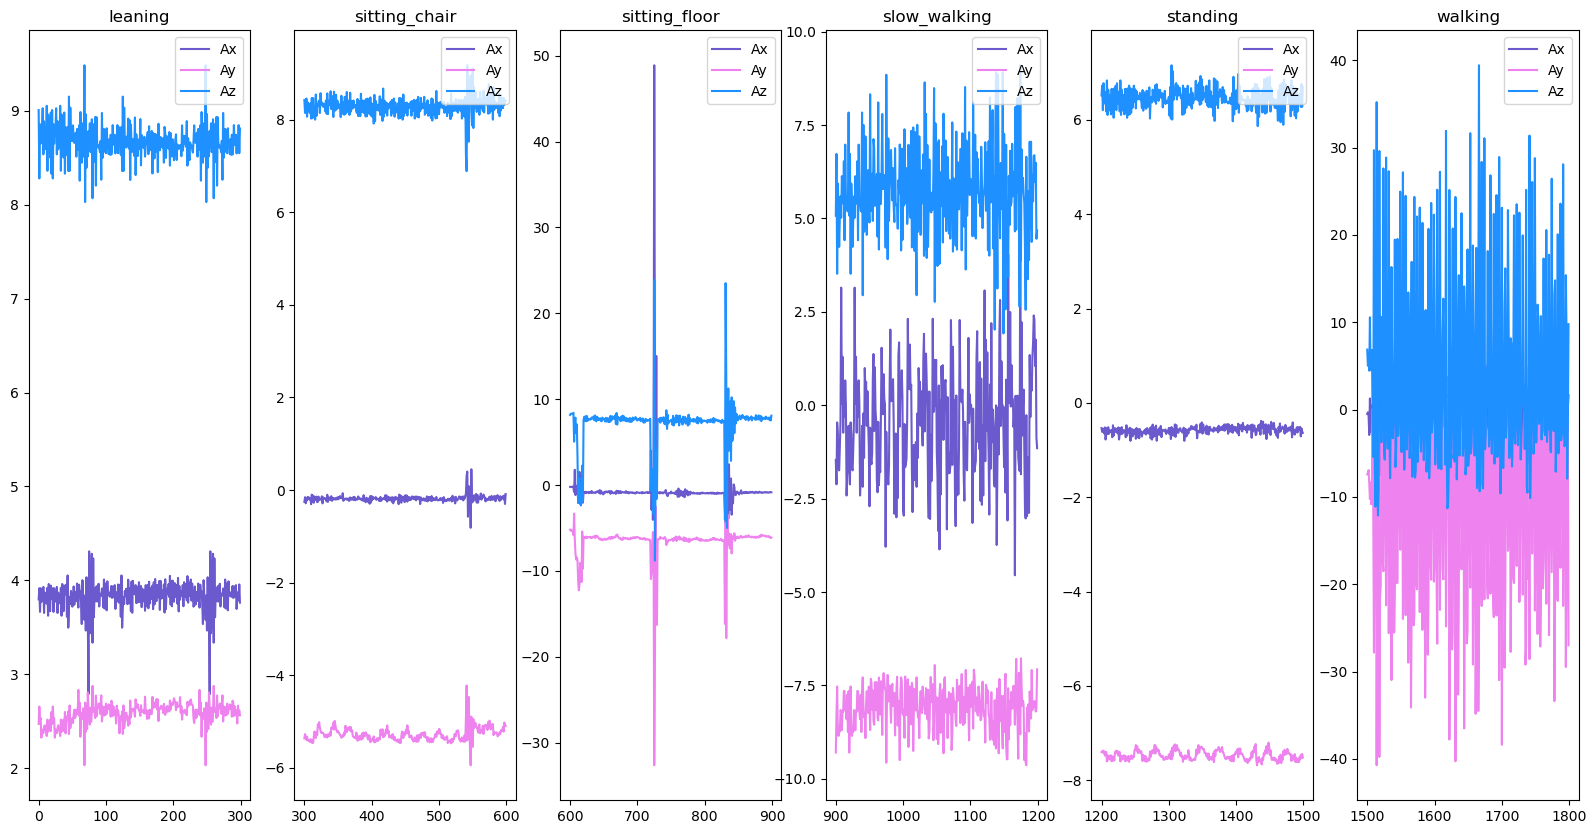

In [97]:
#가속도
#%matplotlib qt

%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

x=[]
Ax=[]
Ay=[]
Az=[]
for i, action in enumerate(actions):
    x.append(visual_df.loc[visual_df['label']==i]['index'])
    Ax.append(visual_df.loc[visual_df['label']==i]['Ax'])
    Ay.append(visual_df.loc[visual_df['label']==i]['Ay'])
    Az.append(visual_df.loc[visual_df['label']==i]['Az'])

fig = plt.figure(figsize=(20, 10))
map=[]
for i, action in enumerate(actions):
    map.append(fig.add_subplot(1, 6, i+1))
    map[i].plot(x[i],Ax[i],'slateblue',label='Ax')
    map[i].plot(x[i],Ay[i],'violet',label='Ay')
    map[i].plot(x[i],Az[i],'dodgerblue',label='Az')
    map[i].legend(loc='upper right')

    plt.title(action)
plt.show()

# train, test set

In [98]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 10, 3)
(9, 10, 3)
(171, 6)
(9, 6)


In [100]:
y_train[0]

array([1, 0, 0, 0, 0, 0])

In [101]:
X_train[0]

array([[3.46660185, 2.38923335, 8.96351337],
       [4.03399992, 2.68384981, 8.39132977],
       [3.6436708 , 2.41794729, 8.72423172],
       [3.60059977, 2.80827641, 8.51336384],
       [2.78913379, 2.64317179, 8.7840519 ],
       [4.30947351, 2.5354948 , 8.60668373],
       [3.43788791, 2.46580362, 8.86540794],
       [3.57188606, 2.64556456, 8.5588274 ],
       [3.99571466, 2.49451756, 8.63539791],
       [4.28315258, 2.59292245, 8.90847874]])

# 모델

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [103]:
model = Sequential() #순차적으로 모델의 레이어를 추가한다.
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,3)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [104]:

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [106]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0909 - categorical_accuracy: 0.9708
Epoch 2/100
6/6 [==============================] - 0s 58ms/step - loss: 0.0297 - categorical_accuracy: 1.0000
Epoch 3/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0838 - categorical_accuracy: 0.9825
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0781 - categorical_accuracy: 0.9649
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 0.1199 - categorical_accuracy: 0.9766
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 0.3530 - categorical_accuracy: 0.9649
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0959 - categorical_accuracy: 0.9825
Epoch 8/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0870 - categorical_accuracy: 0.9766
Epoch 9/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0628 - categorical_accuracy: 0.9883
Epoch 10/1

# 모델 저장

In [107]:
model.save('C:/Users/dlwnr/health care/model/mqtt1/mqtt1.h5')

In [108]:
from keras.models import load_model

model = load_model('C:/Users/dlwnr/health care/model/mqtt1/mqtt1.h5')

# 모델 사용

In [111]:
# 데이터 저장 루프 정의

# 수신 확인
import paho.mqtt.client as mqtt
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
# df에 저장하는 예시

def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe("mobile-ingkle-test-healthcare/sm_sn20_01/data/_all")
    

def on_message(client, userdata, msg):
    global row
    
    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
    
    row=[] 
    row.append((data[1][1],data[2][1],data[3][1]))
    row = np.array(row)
    row = row[0]
    unixtime = data[0][1]
    
    
    p = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/wait.npy') 
    tp = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/time.npy') 
    #ap = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/all_time.npy') 
    
    np.save(p, row)
    np.save(tp, unixtime)
    
    print('row',row)
    #print('unixtime',unixtime)


client = mqtt.Client("mqtt-test") 
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)

#client.loop_forever()

0

In [112]:
import time

cap = cv2.VideoCapture(1)
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = 4
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('C:/Users/dlwnr/health care/model/mqtt1/test.avi', fourcc, fps, (w, h))

f=0
frame_count = 0
total_fps = 0 
window =[]

while cap.isOpened():
    
    ret,frame = cap.read()
    client.loop()
    
    #보여줘
    #cv2.imshow('me',frame) 
    
    if f%3==0:
        row = np.load(os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/wait.npy') )
    
        window.append(row)
        window = window[-10:]
       

        #print('-'*70)
        if len(window) == 10:
            res = model.predict(np.expand_dims(window, axis=0))
            
            a = actions[np.argmax(res)]
            
            
            cv2.putText(frame, f'{a}', (50,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
            cv2.putText(frame, f'{row}', (250,100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.imshow('me',frame)
            out.write(frame)
       

        
        if cv2.waitKey(10)& 0xFF == ord('q'): #q를 누르면 꺼줘
                break
    f = f+1   
out.release()
cap.release()
cv2.destroyAllWindows() 

Mqtt Connected!
row [-0.11006984 -7.40010309  6.58385134]
row [ 1.10368943 -7.45035219  5.82472849]
row [-1.63519514 -7.7521472   6.08105946]
row [ 1.03429759 -8.13769054  6.02123928]
row [-0.85005027 -7.96510839  6.7704916 ]
row [-0.67028946 -7.57986403  5.7098732 ]
row [-0.61046886 -7.79043245  6.45194721]
row [-0.51954162 -7.37378216  6.06191683]
row [-0.61764735 -7.66122007  6.18873644]
row [-0.80907315 -7.77368259  6.04995298]
row [-0.15074782 -7.76411104  6.34187746]
row [-1.19940233 -7.82871771  6.04756021]
row [ 0.14117654 -7.63729191  6.12173748]
row [-0.03828516 -7.8933239   6.47138882]
row [-0.65353966 -7.54367256  5.7816577 ]
row [-0.38554356 -7.76411104  6.37059116]
row [-0.63200426 -7.90289497  6.04277468]
row [-0.61525452 -7.59900665  6.64845753]
row [-0.17467605 -7.09142923  5.69073057]
row [-0.86680001 -7.3785677   6.5503521 ]
row [-0.22971097 -7.20867729  5.67876625]
row [-1.01754785 -7.88614511  6.82791948]
row [-0.46450669 -7.71864748  6.04516745]
row [-0.75643104 -